# **Análise de Tempo de Atendimento:** 
### **Filtrando Outliers para uma Interpretação Precisa**

Na análise de tempo de atendimento, é crucial garantir que os dados representem com precisão a realidade operacional. Para isso, removemos os tempos outliers utilizando a técnica de Intervalo Interquartil (IQR). Outliers são valores extremos que podem distorcer a interpretação dos dados, levando a conclusões equivocadas sobre o desempenho e a eficiência do atendimento. Ao filtrar esses valores, conseguimos uma visão mais clara e precisa dos tempos de espera e atendimento, permitindo identificar padrões e áreas de melhoria com maior confiança.

O Intervalo Interquartil (IQR) é uma medida estatística utilizada para identificar a dispersão dos dados, calculando a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1). Ele é eficaz na detecção de outliers, pois valores que estão abaixo de (Q1 - 1.5 \times IQR) ou acima de (Q3 + 1.5 \times IQR) são considerados outliers. Esses valores extremos podem distorcer a análise dos dados, levando a interpretações incorretas. Ao remover esses outliers, obtemos uma visão mais clara e precisa dos tempos de espera e atendimento, permitindo identificar padrões e áreas de melhoria com maior confiança.


Prompt de AI:

- baixar o excel atendimento_last2m_tratado 

Para tempo de espera:

- calcular tempo de espera em minutos que será assignedUsersAt - createdAt e criar coluna tempo_espera_min. Se o valor for negativo, limitar a 0

- detectar linhas com valores ouliers para tempo_espera_min usando IQR e criar coluna bool tempo_espera_bool com false onde o valor é outiler

- fazer um gráfico de distribuição acumulada e histograma com a coluna tempo_espera_min considerando tempo_espera_bool = true, 

- criar uma coluna tempo_espera_bins para os bins usados no histograma de tempo_espera_min onde tempo_espera_bool = true

- calcular os percentils (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9) do tempo_espera_min onde tempo_espera_bool = true, printar os valores de percentil e plotar um box-plot

- detectar se a ditribuição de tempo_espera_min onde tempo_espera_bool = true é normal

Para tempo de atendimento:

- calcular tempo de atendimento em minutos endedAt - assignedUsersAt e criar coluna tempo_atendimento_min. Se o valor for negativo, limitar a 0

- detectar linhas com valores ouliers para tempo_atendimento_min usando IQR  e criar coluna bool tempo_atendimento_bool com false onde o valor é outiler

- fazer um gráfico de distribuição acumulada e histograma com a coluna tempo_atendimento_min considerando tempo_atendimento_bool = true, 

- criar uma coluna tempo_espera_bins para os bins usados no histograma de tempo_atendimento_min onde tempo_atendimento_bool = true

- calcular os percentils (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9) do tempo_atendimento_min onde tempo_atendimento_bool = true, printar os valores de percentil e plotar um box-plot

- detectar se a ditribuição de tempo_atendimento_min onde tempo_atendimento_bool = true é normal

Para exportar arquivo tratado:

- exportar df_orig para atendimento_last2m_tratado_bool_outliers

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

In [5]:
# Caminho para os arquivos do projeto

# Dirertorio de tabelas auxiliares
aux_file_path = os.path.join(os.getcwd(), 'tabelas_auxiliares') 

# Concatena o diretório com o arquivo de input
input_file_path = os.path.join(aux_file_path, 'atendimento_last2m_tratado.xlsx') 

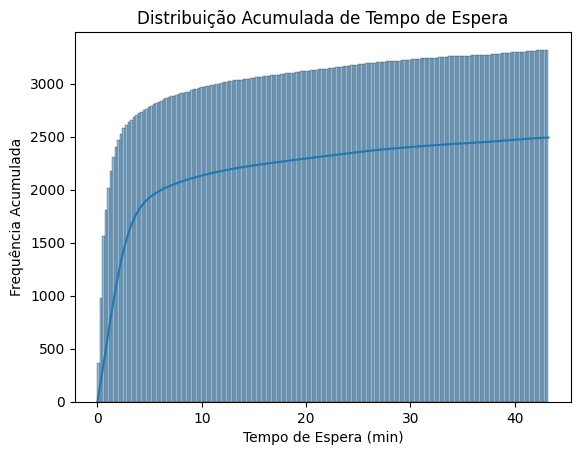

0.1     0.085255
0.2     0.404693
0.3     0.483368
0.4     0.600403
0.5     0.795883
0.6     1.129637
0.7     1.712803
0.8     3.287393
0.9    11.177172
Name: tempo_espera_min, dtype: float64


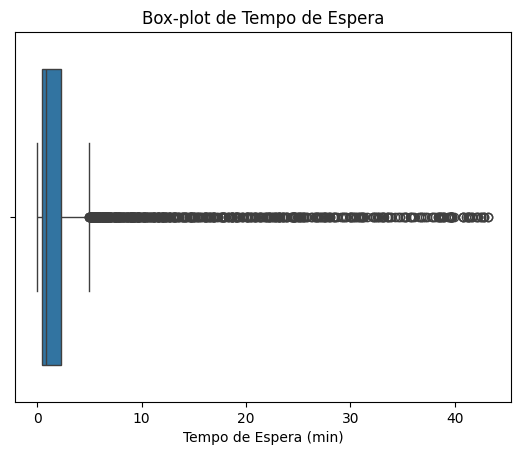

p-value: 0.0
A distribuição de tempo_espera_min não é normal


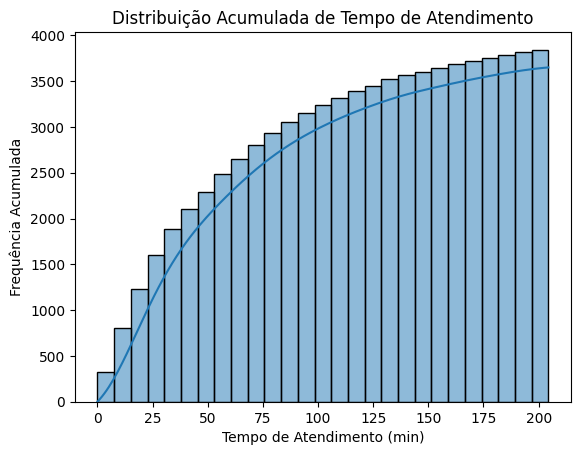

0.1      8.784133
0.2     14.542887
0.3     21.302807
0.4     28.988283
0.5     38.857033
0.6     53.513357
0.7     70.212380
0.8     92.477467
0.9    130.111793
Name: tempo_atendimento_min, dtype: float64


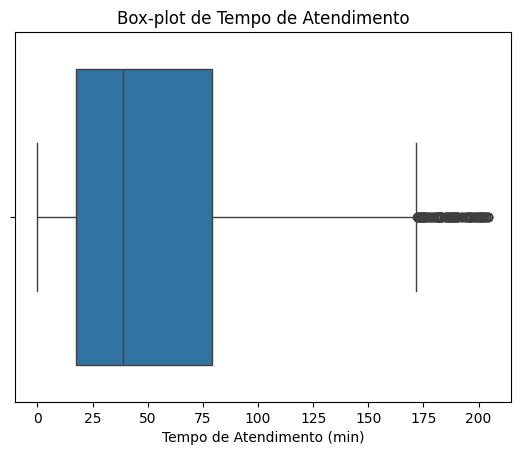

p-value: nan
A distribuição de tempo_atendimento_min é normal


In [6]:
# Baixar o excel e salvar em um dataframe
df_orig = pd.read_excel(input_file_path)

# Calcular tempo de espera em minutos
df_orig['tempo_espera_min'] = (pd.to_datetime(df_orig['assignedUsersAt']) - pd.to_datetime(df_orig['createdAt'])).dt.total_seconds() / 60
df_orig['tempo_espera_min'] = df_orig['tempo_espera_min'].apply(lambda x: max(x, 0))

# Detectar outliers para tempo_espera_min usando IQR
Q1_espera = df_orig['tempo_espera_min'].quantile(0.25)
Q3_espera = df_orig['tempo_espera_min'].quantile(0.75)
IQR_espera = Q3_espera - Q1_espera
df_orig['tempo_espera_bool'] = ~((df_orig['tempo_espera_min'] < (Q1_espera - 1.5 * IQR_espera)) | (df_orig['tempo_espera_min'] > (Q3_espera + 1.5 * IQR_espera)))

# Gráfico de distribuição acumulada e histograma para tempo_espera_min
sns.histplot(df_orig[df_orig['tempo_espera_bool']]['tempo_espera_min'], kde=True, cumulative=True)
plt.title('Distribuição Acumulada de Tempo de Espera')
plt.xlabel('Tempo de Espera (min)')
plt.ylabel('Frequência Acumulada')
plt.show()

# Criar bins para tempo_espera_min
if not df_orig[df_orig['tempo_espera_bool']]['tempo_espera_min'].empty:
    df_orig['tempo_espera_bins'] = pd.cut(df_orig[df_orig['tempo_espera_bool']]['tempo_espera_min'], bins=10)

# Calcular percentis para tempo_espera_min
percentis_espera = df_orig[df_orig['tempo_espera_bool']]['tempo_espera_min'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
print(percentis_espera)

# Box-plot para tempo_espera_min
sns.boxplot(x=df_orig[df_orig['tempo_espera_bool']]['tempo_espera_min'])
plt.title('Box-plot de Tempo de Espera')
plt.xlabel('Tempo de Espera (min)')
plt.show()

# Verificar se a distribuição de tempo_espera_min é normal
k2, p = stats.normaltest(df_orig[df_orig['tempo_espera_bool']]['tempo_espera_min'])
print("p-value:", p)
if p < 0.05:
    print("A distribuição de tempo_espera_min não é normal")
else:
    print("A distribuição de tempo_espera_min é normal")

# Calcular tempo de atendimento em minutos
df_orig['tempo_atendimento_min'] = (pd.to_datetime(df_orig['endedAt']) - pd.to_datetime(df_orig['assignedUsersAt'])).dt.total_seconds() / 60
df_orig['tempo_atendimento_min'] = df_orig['tempo_atendimento_min'].apply(lambda x: max(x, 0))

# Detectar outliers para tempo_atendimento_min usando IQR
Q1_atendimento = df_orig['tempo_atendimento_min'].quantile(0.25)
Q3_atendimento = df_orig['tempo_atendimento_min'].quantile(0.75)
IQR_atendimento = Q3_atendimento - Q1_atendimento
df_orig['tempo_atendimento_bool'] = ~((df_orig['tempo_atendimento_min'] < (Q1_atendimento - 1.5 * IQR_atendimento)) | (df_orig['tempo_atendimento_min'] > (Q3_atendimento + 1.5 * IQR_atendimento)))

# Gráfico de distribuição acumulada e histograma para tempo_atendimento_min
sns.histplot(df_orig[df_orig['tempo_atendimento_bool']]['tempo_atendimento_min'], kde=True, cumulative=True)
plt.title('Distribuição Acumulada de Tempo de Atendimento')
plt.xlabel('Tempo de Atendimento (min)')
plt.ylabel('Frequência Acumulada')
plt.show()

# Criar bins para tempo_atendimento_min
if not df_orig[df_orig['tempo_atendimento_bool']]['tempo_atendimento_min'].empty:
    df_orig['tempo_atendimento_bins'] = pd.cut(df_orig[df_orig['tempo_atendimento_bool']]['tempo_atendimento_min'], bins=10)

# Calcular percentis para tempo_atendimento_min
percentis_atendimento = df_orig[df_orig['tempo_atendimento_bool']]['tempo_atendimento_min'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
print(percentis_atendimento)

# Box-plot para tempo_atendimento_min
sns.boxplot(x=df_orig[df_orig['tempo_atendimento_bool']]['tempo_atendimento_min'])
plt.title('Box-plot de Tempo de Atendimento')
plt.xlabel('Tempo de Atendimento (min)')
plt.show()

# Verificar se a distribuição de tempo_atendimento_min é normal
k2, p = stats.normaltest(df_orig[df_orig['tempo_atendimento_bool']]['tempo_atendimento_min'])
print("p-value:", p)
if p < 0.05:
    print("A distribuição de tempo_atendimento_min não é normal")
else:
    print("A distribuição de tempo_atendimento_min é normal")

In [8]:
# Exportar df_orig para um novo arquivo Excel
df_orig.to_excel(os.path.join(aux_file_path, 'atendimento_last2m_tratado_bool_outliers.xlsx'), index=False)